In [1]:
# Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# read the csv file
df = pd.read_csv('./data/new_discipline.csv')
print(f'Shape: {df.shape}\n')
df.head()

Shape: (311942, 6)



,STUDENTID,OFFENSE_DATE,ACTION_DURATION_ACTUAL,ISS,OSS,REFERRAL
0,143624,2017-02-21,3.0,0,1,0
1,143624,2017-02-21,NaN,0,0,1
2,143624,2017-02-21,NaN,0,0,1
3,143624,2017-02-21,3.0,0,1,0
4,143624,2017-02-21,1.0,1,0,1


In [3]:
# dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311942 entries, 0 to 311941
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   STUDENTID               311942 non-null  int64  
 1   OFFENSE_DATE            311942 non-null  object 
 2   ACTION_DURATION_ACTUAL  169203 non-null  float64
 3   ISS                     311942 non-null  int64  
 4   OSS                     311942 non-null  int64  
 5   REFERRAL                311942 non-null  int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 14.3+ MB


In [4]:
# convert the OFFENSE_DATE feature to datetime 
df['OFFENSE_DATE'] = df['OFFENSE_DATE'].apply(pd.to_datetime)
print(f'type: {df.OFFENSE_DATE.dtype}\n')

# Seperate [dd mm yyyy] into new cols
df['YEAR'] = pd.DatetimeIndex(df['OFFENSE_DATE']).year
df['MONTH'] = pd.DatetimeIndex(df['OFFENSE_DATE']).month
df['DAY'] = pd.DatetimeIndex(df['OFFENSE_DATE']).day

# make a copy of df
df1 = df.copy()
df1.head(10)


type: datetime64[ns]



,STUDENTID,OFFENSE_DATE,ACTION_DURATION_ACTUAL,ISS,OSS,REFERRAL,YEAR,MONTH,DAY
0,143624,2017-02-21,3.0,0,1,0,2017,2,21
1,143624,2017-02-21,NaN,0,0,1,2017,2,21
2,143624,2017-02-21,NaN,0,0,1,2017,2,21
3,143624,2017-02-21,3.0,0,1,0,2017,2,21
4,143624,2017-02-21,1.0,1,0,1,2017,2,21
5,68649,2017-02-21,3.0,0,1,0,2017,2,21
6,68649,2017-02-21,NaN,0,0,1,2017,2,21
7,68649,2017-02-21,NaN,0,0,1,2017,2,21
8,68649,2017-02-21,3.0,0,1,0,2017,2,21
9,68649,2017-02-21,1.0,1,0,1,2017,2,21


In [5]:
# Number of Samples in each year
df1.YEAR.value_counts()

2015    43756
2017    42837
2016    40036
2018    38010
2019    35846
2014    35395
2013    18081
2009    10818
2010     8699
2020     8541
2008     8474
2012     5871
2007     5246
2011     4197
2006     3071
2005     1516
2004      942
2021      424
2003      174
2002        7
2022        1
Name: YEAR, dtype: int64

In [6]:
# Consider 2018 for our EDA
df_2018 = df1[df1.YEAR == 2018]
print(f'Shape: {df_2018.shape}')
print(f'Info: /n{df_2018.info()}\n')
df_2018.head(10)

Shape: (38010, 9)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 38010 entries, 18160 to 311506
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   STUDENTID               38010 non-null  int64         
 1   OFFENSE_DATE            38010 non-null  datetime64[ns]
 2   ACTION_DURATION_ACTUAL  21536 non-null  float64       
 3   ISS                     38010 non-null  int64         
 4   OSS                     38010 non-null  int64         
 5   REFERRAL                38010 non-null  int64         
 6   YEAR                    38010 non-null  int64         
 7   MONTH                   38010 non-null  int64         
 8   DAY                     38010 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(7)
memory usage: 2.9 MB
Info: /nNone



,STUDENTID,OFFENSE_DATE,ACTION_DURATION_ACTUAL,ISS,OSS,REFERRAL,YEAR,MONTH,DAY
18160,82310,2018-01-24,6.0,1,0,0,2018,1,24
18161,82310,2018-01-24,4.0,1,0,0,2018,1,24
18162,142201,2018-01-24,6.0,1,0,0,2018,1,24
18163,142201,2018-01-24,4.0,1,0,0,2018,1,24
19573,70526,2018-07-31,NaN,0,0,0,2018,7,31
19574,70526,2018-07-31,NaN,0,0,0,2018,7,31
19575,70526,2018-07-31,3.0,0,0,0,2018,7,31
19576,70526,2018-07-31,3.0,0,0,0,2018,7,31
19581,82383,2018-07-31,NaN,0,0,0,2018,7,31
19582,82383,2018-07-31,NaN,0,0,0,2018,7,31


If we look at the Offence date here, 'SAME' student has offence listed on the same day multiple times. Are they duplicates? but the action_duration_actual are different. Need to have a check on this.

To eliminate this, using drop duplicates for now and going ahead

In [7]:
df1_2018 = df_2018.drop_duplicates()
print(f'Shape: {df1_2018.shape}')
print(f'Info: /n{df1_2018.info()}\n')
df1_2018.head(10)

Shape: (29020, 9)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 29020 entries, 18160 to 311506
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   STUDENTID               29020 non-null  int64         
 1   OFFENSE_DATE            29020 non-null  datetime64[ns]
 2   ACTION_DURATION_ACTUAL  17744 non-null  float64       
 3   ISS                     29020 non-null  int64         
 4   OSS                     29020 non-null  int64         
 5   REFERRAL                29020 non-null  int64         
 6   YEAR                    29020 non-null  int64         
 7   MONTH                   29020 non-null  int64         
 8   DAY                     29020 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(7)
memory usage: 2.2 MB
Info: /nNone



,STUDENTID,OFFENSE_DATE,ACTION_DURATION_ACTUAL,ISS,OSS,REFERRAL,YEAR,MONTH,DAY
18160,82310,2018-01-24,6.0,1,0,0,2018,1,24
18161,82310,2018-01-24,4.0,1,0,0,2018,1,24
18162,142201,2018-01-24,6.0,1,0,0,2018,1,24
18163,142201,2018-01-24,4.0,1,0,0,2018,1,24
19573,70526,2018-07-31,NaN,0,0,0,2018,7,31
19575,70526,2018-07-31,3.0,0,0,0,2018,7,31
19581,82383,2018-07-31,NaN,0,0,0,2018,7,31
19583,82383,2018-07-31,3.0,0,0,0,2018,7,31
21122,198102,2018-01-25,NaN,0,0,0,2018,1,25
21123,198102,2018-01-25,10.0,0,0,0,2018,1,25


In [8]:
# missing values in actual_duration_actual
df1_2018.isna().sum()

STUDENTID                     0
OFFENSE_DATE                  0
ACTION_DURATION_ACTUAL    11276
ISS                           0
OSS                           0
REFERRAL                      0
YEAR                          0
MONTH                         0
DAY                           0
dtype: int64

In [9]:
# describe action_duration_actual col
df1_2018.ACTION_DURATION_ACTUAL.describe()

count    17744.000000
mean         2.664422
std          3.093706
min          0.500000
25%          2.000000
50%          2.000000
75%          3.000000
max        135.000000
Name: ACTION_DURATION_ACTUAL, dtype: float64

- Avg suspension days = 2.66 or ~ 3days
- min suspension days = 0.5 day
- max suspension days = 135 days

There are around ~38% missing values in action_duration_actual, two options:
- drop them to have dataset with values, so our dataset will have ~28k samples for the year 2018 to analyze.
- fill them with median

Dropping them makes sense, as our final goal is to have an understanding of discipline data if it can be a feature to model attendace.

In [10]:
# droppipng missing values
data = df1_2018.dropna()
print(f'Shape: {data.shape}')
print(f'Info: /n{data.info()}\n')
data.head(10)

Shape: (17744, 9)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 17744 entries, 18160 to 241145
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   STUDENTID               17744 non-null  int64         
 1   OFFENSE_DATE            17744 non-null  datetime64[ns]
 2   ACTION_DURATION_ACTUAL  17744 non-null  float64       
 3   ISS                     17744 non-null  int64         
 4   OSS                     17744 non-null  int64         
 5   REFERRAL                17744 non-null  int64         
 6   YEAR                    17744 non-null  int64         
 7   MONTH                   17744 non-null  int64         
 8   DAY                     17744 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(7)
memory usage: 1.4 MB
Info: /nNone



,STUDENTID,OFFENSE_DATE,ACTION_DURATION_ACTUAL,ISS,OSS,REFERRAL,YEAR,MONTH,DAY
18160,82310,2018-01-24,6.0,1,0,0,2018,1,24
18161,82310,2018-01-24,4.0,1,0,0,2018,1,24
18162,142201,2018-01-24,6.0,1,0,0,2018,1,24
18163,142201,2018-01-24,4.0,1,0,0,2018,1,24
19575,70526,2018-07-31,3.0,0,0,0,2018,7,31
19583,82383,2018-07-31,3.0,0,0,0,2018,7,31
21123,198102,2018-01-25,10.0,0,0,0,2018,1,25
23597,84027,2018-02-21,2.0,0,0,0,2018,2,21
23604,160912,2018-05-29,2.0,0,1,0,2018,5,29
24213,93841,2018-03-29,2.0,0,0,0,2018,3,29


In [11]:
# Description of filtered data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
STUDENTID,17744.0,119516.366152,44678.048570,54305.0,84366.0,98874.5,160709.0,218416.0
ACTION_DURATION_ACTUAL,17744.0,2.664422,3.093706,0.5,2.0,2.0,3.0,135.0
ISS,17744.0,0.127085,0.333078,0.0,0.0,0.0,0.0,1.0
OSS,17744.0,0.117392,0.321896,0.0,0.0,0.0,0.0,1.0
REFERRAL,17744.0,0.003776,0.061334,0.0,0.0,0.0,0.0,1.0
YEAR,17744.0,2018.000000,0.000000,2018.0,2018.0,2018.0,2018.0,2018.0
MONTH,17744.0,6.338142,3.777793,1.0,3.0,5.0,10.0,12.0
DAY,17744.0,15.426736,8.867333,1.0,8.0,15.0,23.0,31.0


c:\Users\Vishnu.Prabhas\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='MONTH', ylabel='count'>

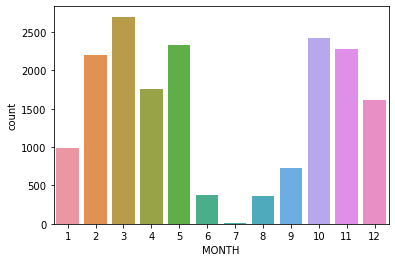

In [12]:
# Number of incidents by month
sns.countplot(data.MONTH)

c:\Users\Vishnu.Prabhas\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='DAY', ylabel='count'>

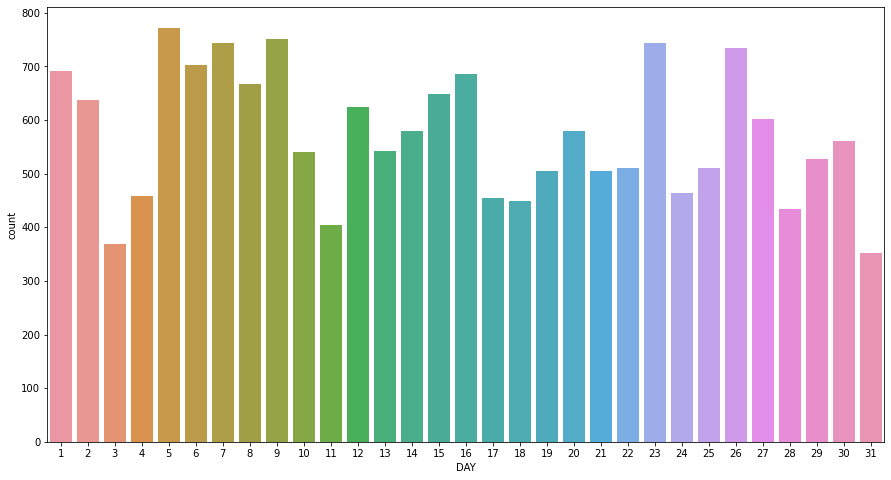

In [21]:
# Number of incidents by day
plt.figure(figsize=(15,8))
sns.countplot(data.DAY)

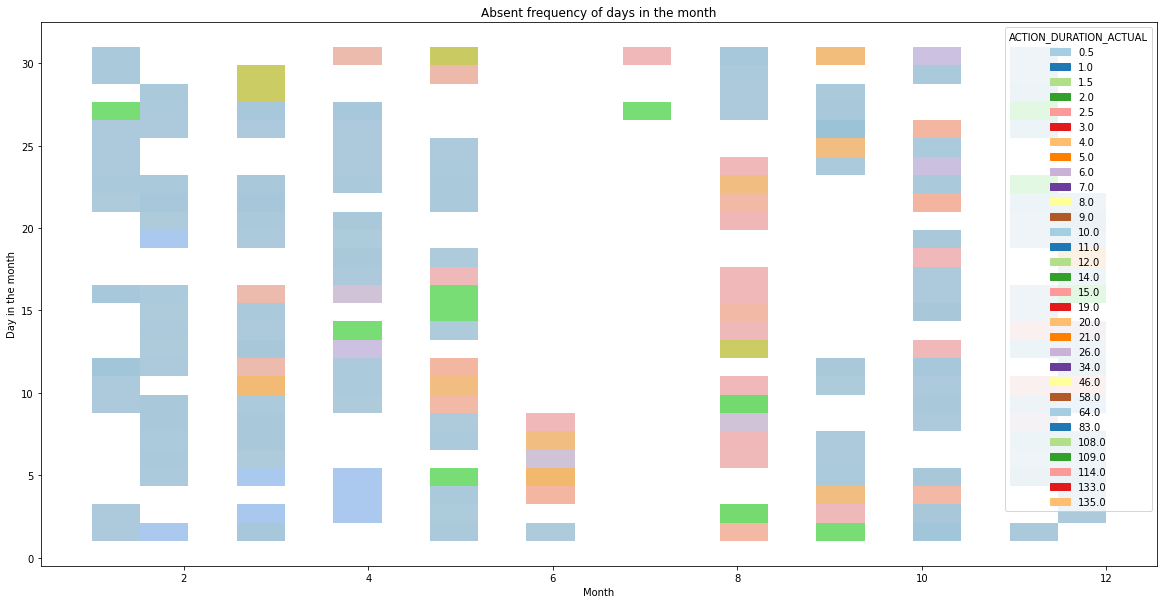

In [14]:
plt.figure(figsize=(20,10))
sns.histplot(data, x=data.MONTH, y=data.DAY, hue=data.ACTION_DURATION_ACTUAL, palette="Paired")
plt.title("Absent frequency of days in the month")
plt.xlabel("Month")
plt.ylabel("Day in the month")
plt.show()

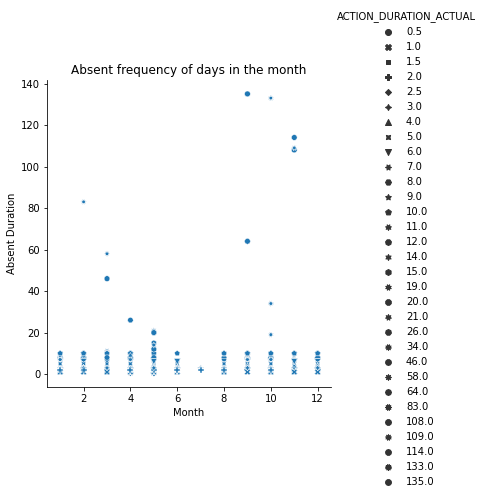

In [15]:
sns.relplot(data=data, x='MONTH', y='ACTION_DURATION_ACTUAL', style="ACTION_DURATION_ACTUAL")
plt.title("Absent frequency of days in the month")
plt.xlabel("Month")
plt.ylabel("Absent Duration")
plt.show()

Short duration suspension is maximun in MAY, hence there will be frequent absentees in MAY.

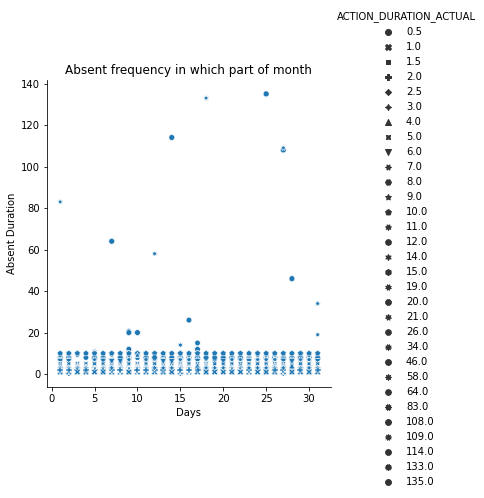

In [16]:
sns.relplot(data=data, x='DAY', y='ACTION_DURATION_ACTUAL', style="ACTION_DURATION_ACTUAL")
plt.title("Absent frequency in which part of month")
plt.xlabel("Days")
plt.ylabel("Absent Duration")
plt.show()

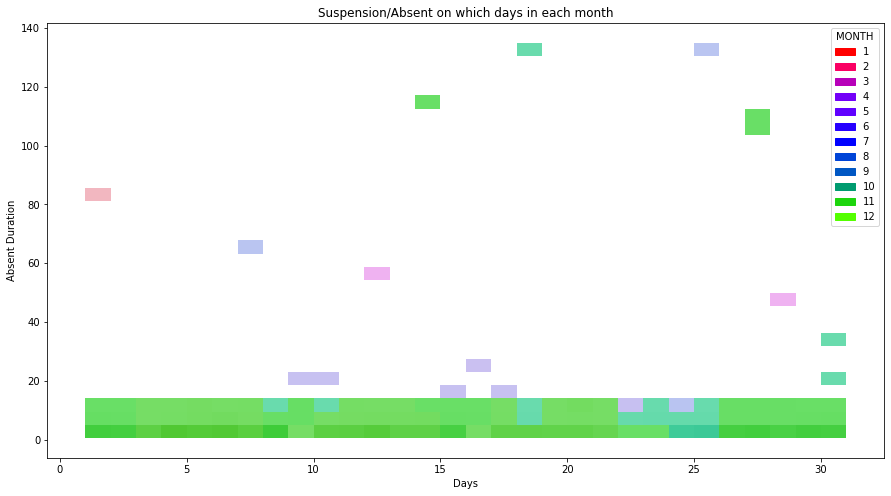

In [31]:
plt.figure(figsize=(15,8))
sns.histplot(data=data, x='DAY', y='ACTION_DURATION_ACTUAL', bins=30, hue='MONTH', palette="prism")
plt.title("Suspension/Absent on which days in each month")
plt.xlabel("Days")
plt.ylabel("Absent Duration")
plt.show()

In [33]:
data.columns

Index(['STUDENTID', 'OFFENSE_DATE', 'ACTION_DURATION_ACTUAL', 'ISS', 'OSS',
       'REFERRAL', 'YEAR', 'MONTH', 'DAY'],
      dtype='object')